# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os
from IPython.display import clear_output

In [2]:
from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
pd.options.display.max_colwidth = -1

from dsutils import *

# Data

In [4]:
data = pd.read_csv('data.csv')

# Vectorizisation and Over Sampling

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer(smooth_idf=True)
vectorizer.fit(data['Text'].astype(str))

TfidfVectorizer()

In [7]:
col = 'Spam'
q, r = divmod((data[col].value_counts().max() / data[col].value_counts())[1], 1)

data_over = pd.concat(
    [data[data[col] == 1]]*int(q) + 
    [data[data[col] == 1].sample(frac=r), data[data[col] == 0]]
).sample(frac=1.00)[[col, 'Text']]

vector = vectorizer.transform(data_over['Text'].astype(str))
y = data_over[col].astype('int').values

In [8]:
print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (39654, 282252)
Y shape (39654,)


# Machine Learning

In [9]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Multinomial NB

Mean Loss 0.5564885066571532 +- 0.004688521996982719


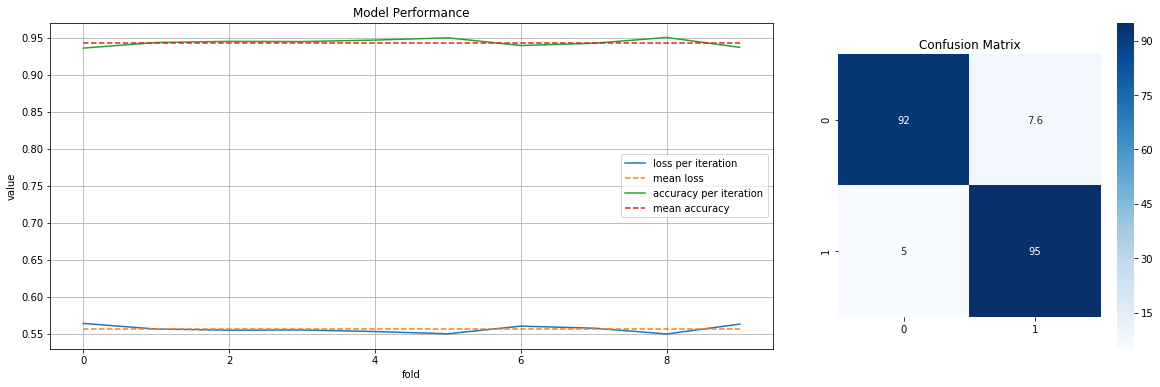

In [10]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(mnb_performance['loss']), '+-', np.std(mnb_performance['loss']))

## Bernoulli NB

Mean Loss 0.670146783600071 +- 0.006006491302696071


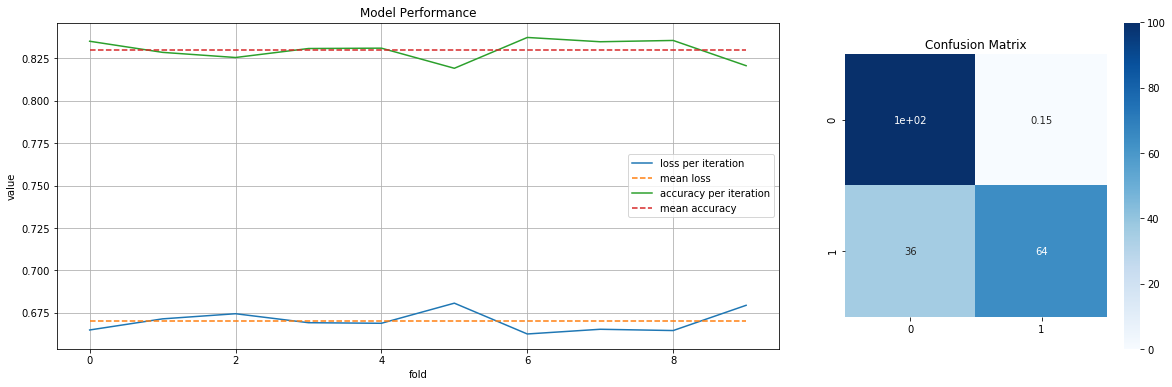

In [11]:
model = BernoulliNB()
bnb_performance, bnb_cm, bnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(bnb_performance['loss']), '+-', np.std(bnb_performance['loss']))

## Logistic Regression

Mean Loss 0.5341958348357 +- 0.002201849188997389


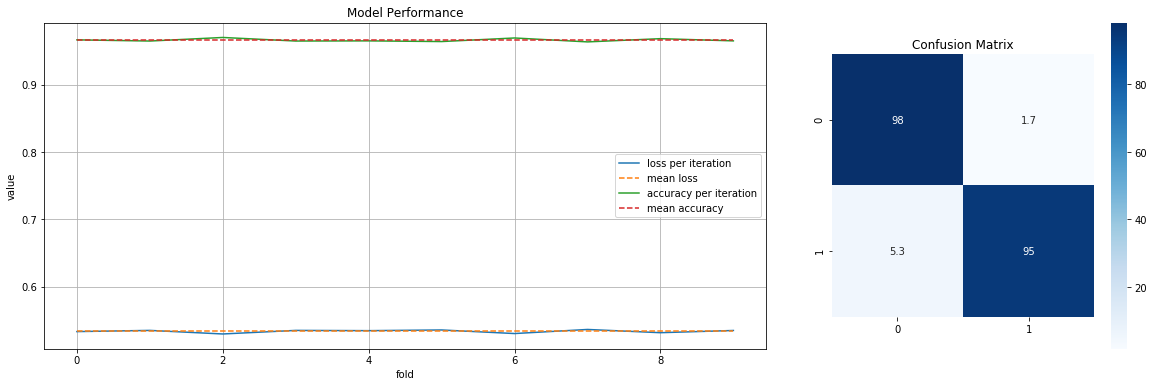

In [12]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=101, warm_start=True)
lr1_performance, lr1_cm, lr1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr1_performance['loss']), '+-', np.std(lr1_performance['loss']))

Mean Loss 0.5260754496448057 +- 0.003242265683461863


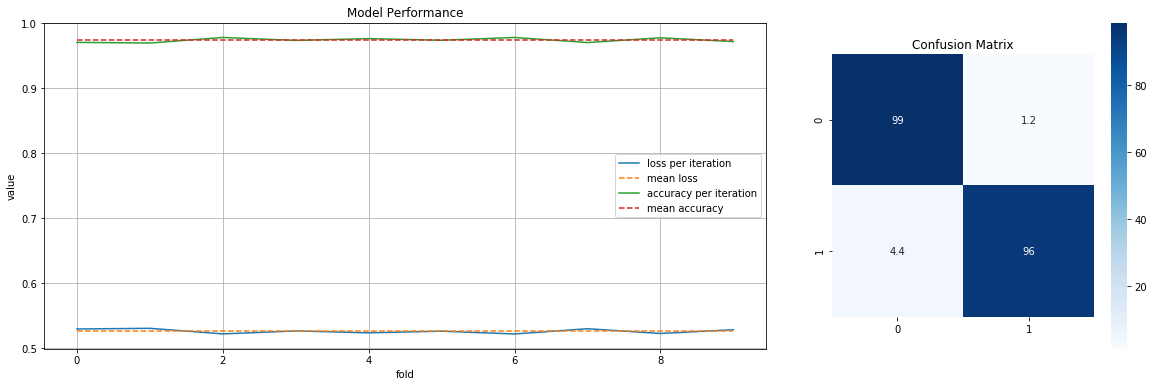

In [13]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=101, warm_start=True)
lr2_performance, lr2_cm, lr2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr2_performance['loss']), '+-', np.std(lr2_performance['loss']))

## SGD Classifier - log loss

Mean Loss 0.5573205347598343 +- 0.004157632561861256


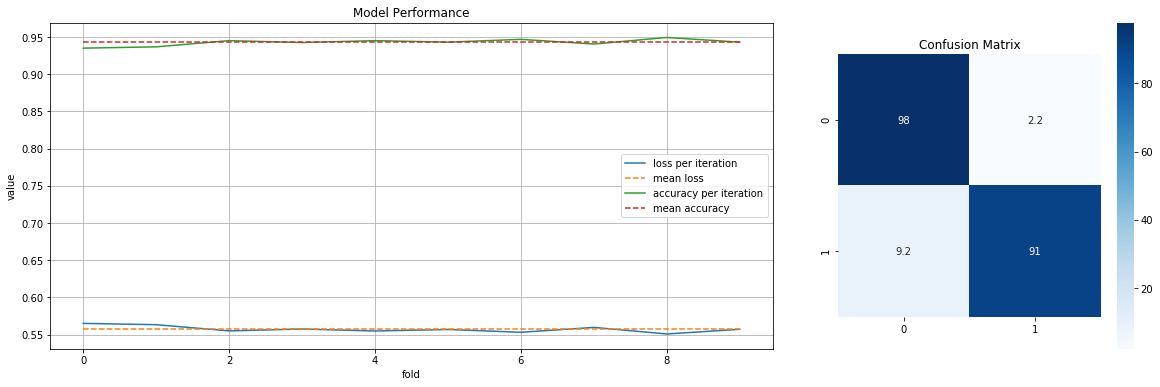

In [14]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdl1_performance, sgdl1_cm, sgdl1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl1_performance['loss']), '+-', np.std(sgdl1_performance['loss']))

Mean Loss 0.5404749322583702 +- 0.004134880800491637


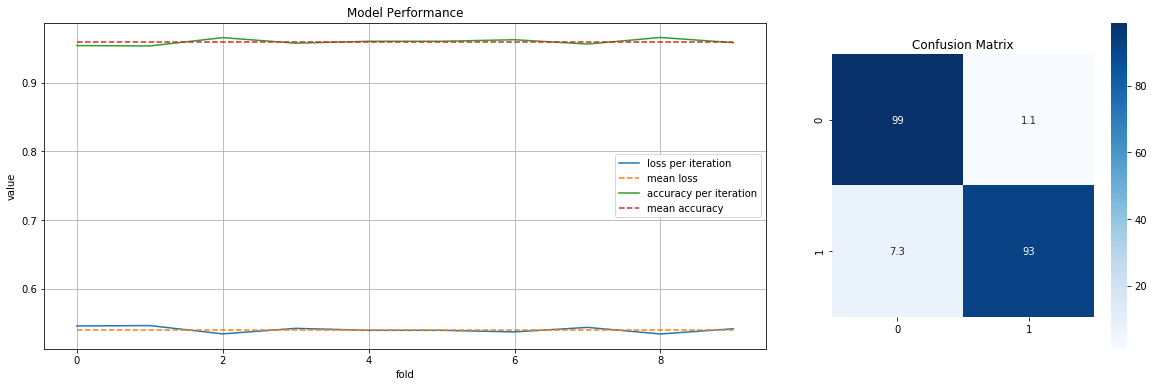

In [15]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdl2_performance, sgdl2_cm, sgdl2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl2_performance['loss']), '+-', np.std(sgdl2_performance['loss']))

## SGD Classifier - hinge loss

Mean Loss 0.5456699855454847 +- 0.003550636376867173


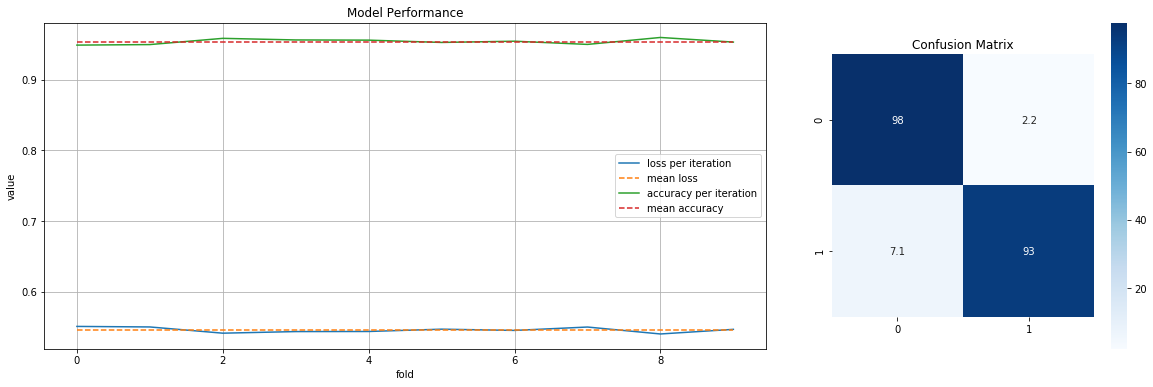

In [16]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdh1_performance, sgdh1_cm, sgdh1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh1_performance['loss']), '+-', np.std(sgdh1_performance['loss']))

Mean Loss 0.5243353816392681 +- 0.003449573110175056


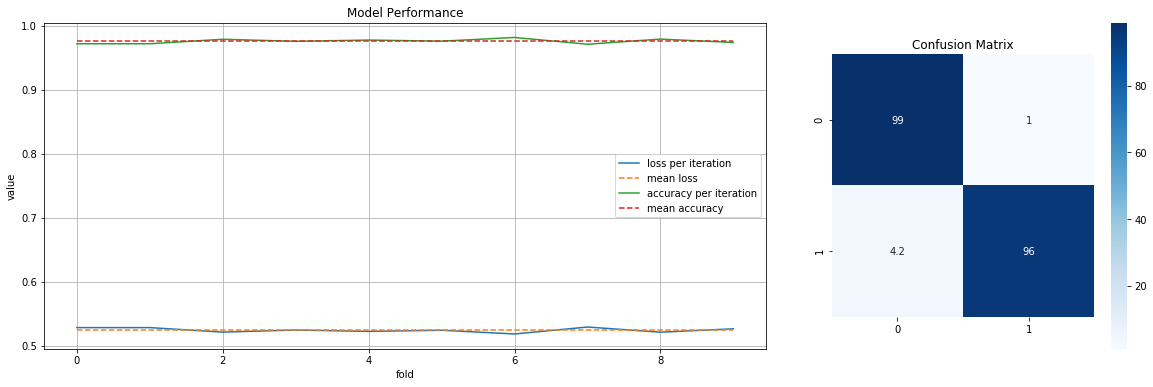

In [17]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdh2_performance, sgdh2_cm, sgdh2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh2_performance['loss']), '+-', np.std(sgdh2_performance['loss']))

## SGD Classifier - perceptron loss

Mean Loss 0.656279205529472 +- 0.06912477377558642


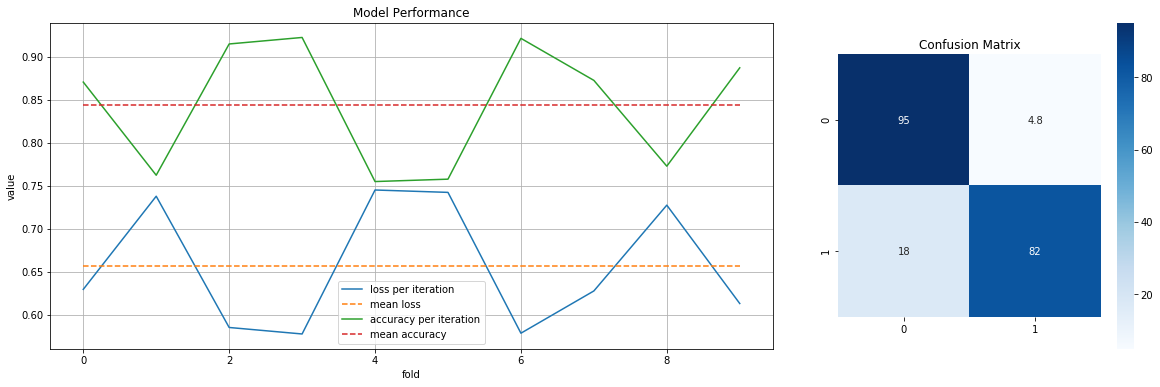

In [18]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdp1_performance, sgdp1_cm, sgdp1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp1_performance['loss']), '+-', np.std(sgdp1_performance['loss']))

Mean Loss 0.5149291995835981 +- 0.0020463896329974106


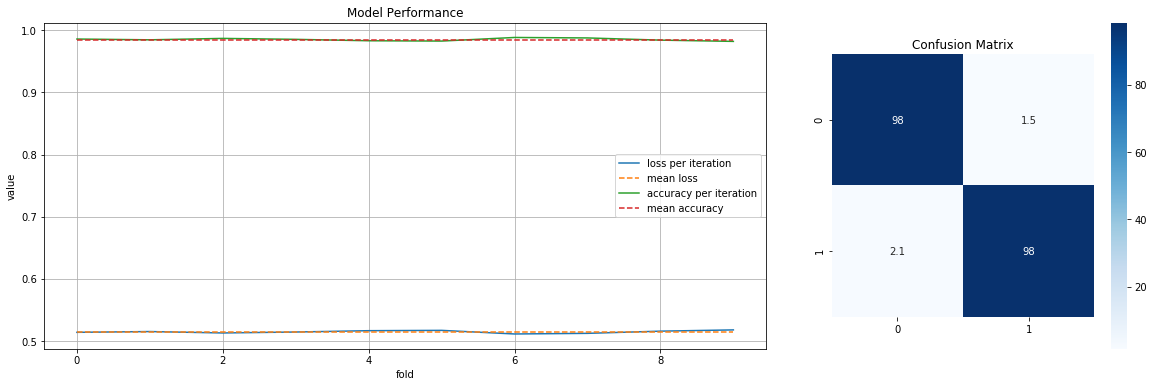

In [19]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdp2_performance, sgdp2_cm, sgdp2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp2_performance['loss']), '+-', np.std(sgdp2_performance['loss']))

## Decision Tree

Mean Loss 0.5312200615700033 +- 0.0016825857280295413


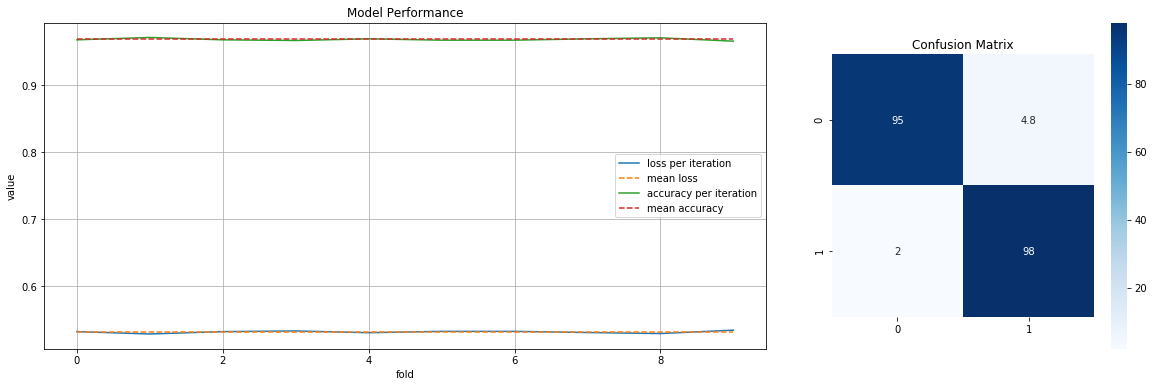

In [20]:
model = DecisionTreeClassifier(random_state=101)
dt_performance, dt_cm, dt_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(dt_performance['loss']), '+-', np.std(dt_performance['loss']))

In [21]:
cm = [
    mnb_cm, bnb_cm, lr1_cm, lr2_cm, sgdl1_cm, sgdl2_cm, sgdh1_cm, sgdh2_cm, sgdp1_cm, sgdp2_cm, dt_cm
]

model = [
    'MultinomialNB', 'BernoulliNB', 'LogisticRegression1', 'LogisticRegression2', 'SGDClassifierL1', 'SGDClassifierL2',
    'SGDClassifierH1', 'SGDClassifierH2', 'SGDClassifierP1', 'SGDClassifierP2', 'DecisionTreeClassifier'
]

performance = pd.DataFrame({
    'FP': [x[0][1] for x in cm],
    'FN': [x[1][0] for x in cm]
}, index=model)

In [22]:
performance

,FP,FN
MultinomialNB,7.564297,5.045409
BernoulliNB,0.151286,35.721493
LogisticRegression1,1.714574,5.348133
LogisticRegression2,1.210287,4.439960
SGDClassifierL1,2.218860,9.182644
SGDClassifierL2,1.059002,7.265388
SGDClassifierH1,2.218860,7.063572
SGDClassifierH2,1.008573,4.238143
SGDClassifierP1,4.841150,17.709384
SGDClassifierP2,1.512859,2.068618


Mean Loss 0.5233015054190123 +- 0.003362247254201648


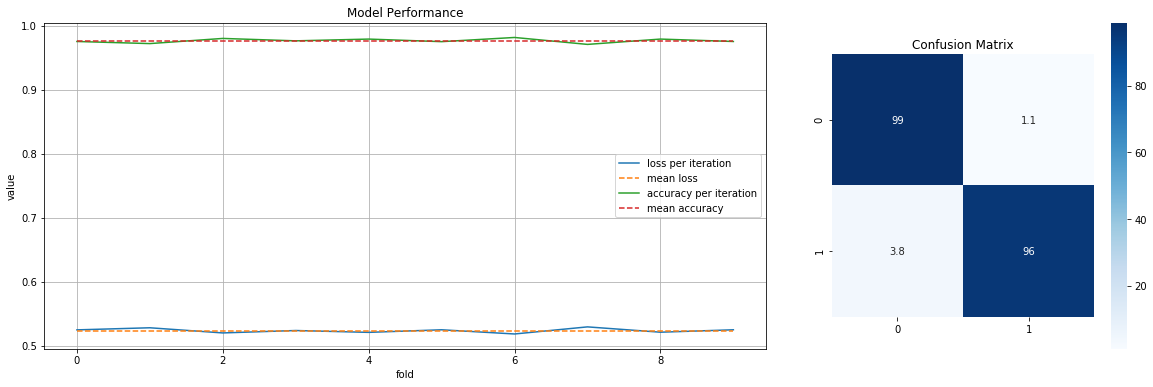

In [23]:
model = VotingClassifier(estimators=[
    ('MNB', MultinomialNB()),
    ('LR-1', LogisticRegression(solver='liblinear', max_iter=100000, class_weight='balanced', random_state=101, 
                                warm_start=True)),
    ('LR-2', LogisticRegression(solver='lbfgs', max_iter=100000, class_weight='balanced', random_state=101, warm_start=True)),
    ('SGD-L1', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L2', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H1', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H2', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P2', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('DT', DecisionTreeClassifier(random_state=101)),
], weights=[0.6, 1.1, 2.1, 0.7, 0.9, 1, 2.1, 3, 1.95])
v_performance, v_cm, v_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(v_performance['loss']), '+-', np.std(v_performance['loss']))

In [24]:
pickle.dump(vectorizer, open('Vectorizer-spam-2.pkl', 'wb'))

In [25]:
pickle.dump(v_model, open('SpamClassifier-2.pkl', 'wb'))